In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import array

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense 

Se cuenta con datos de temperatura (TMP) correspodientes a la estacion ACO (Acolman), ubicada en el Estado de México en la comunidad Acolman de Nezahualcóyotl, al NE en la CDMX, dicha estacion forma parte de la Red de Meteorología y Radiación Solar (REDMET), los datos corresponden al periodo que va del 25/08/2022 al 01/05/2023, contando con un total de 5689 observaciones.

|cve_estac|	nom_estac|	longitud |	latitud|	alt|obs_estac	id_station|
|---------|----------|-----------|---------|-------|----------------------|
|ACO      |	Acolman  | -98.912003|19.635501|   2198|	   484150020109.00|


In [247]:
#LEER TABLA DE DATOS
TMP = pd.read_csv('C:/Users/juanj/Documents/GitHub/Aprendizaje-Profundo/Datos/acoTMP.csv', header=0,sep=",")# 25-08-22  a   01-05-2023
print(TMP)
print(len(TMP['value']))

            date  value
0     25/08/2022   12.4
1     25/08/2022   14.6
2     25/08/2022   16.7
3     25/08/2022   19.1
4     25/08/2022   20.7
...          ...    ...
5684  30/04/2023   19.8
5685  30/04/2023   18.6
5686  30/04/2023   17.8
5687  30/04/2023   16.8
5688  01/05/2023   15.6

[5689 rows x 2 columns]
5689


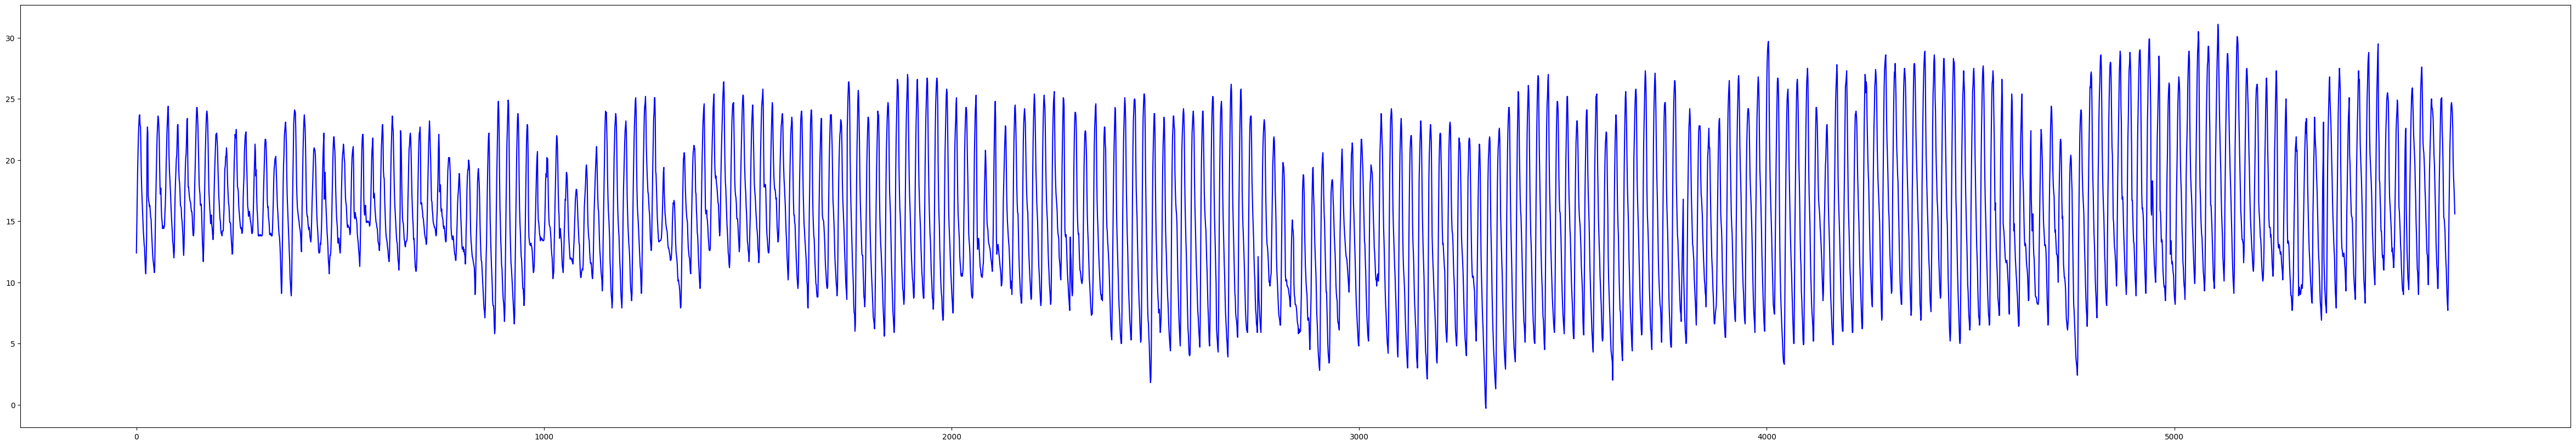

In [248]:
plt.figure(figsize=(60, 10), linewidth=1)
plt.plot(TMP.iloc[:,1],color="blue")

Los Datos los trasformaremoa en una lista y posteriormente aremos un arreglo de 9 predictoras, es decir, partiremos la lista en 9 secciones, correspondientes a cada mes, que corresponderan a los datos de entrenamiento.

In [249]:
secuenciaTMP = list(TMP.iloc[:,1]) # seleccionamos todo el rango de la col 1
secuenciaTMP


[12.4,
 14.6,
 16.7,
 19.1,
 20.7,
 22.0,
 22.9,
 23.6,
 23.7,
 22.9,
 22.7,
 21.1,
 18.9,
 17.6,
 16.8,
 15.9,
 15.0,
 14.2,
 13.7,
 13.1,
 12.8,
 11.9,
 11.1,
 10.7,
 11.8,
 13.7,
 21.4,
 22.7,
 22.2,
 17.1,
 16.7,
 16.5,
 16.2,
 16.3,
 15.8,
 15.3,
 15.2,
 14.3,
 13.6,
 13.0,
 12.2,
 11.8,
 11.5,
 11.2,
 10.8,
 11.3,
 13.6,
 15.8,
 17.6,
 19.2,
 20.8,
 22.1,
 22.8,
 23.6,
 23.4,
 22.8,
 21.8,
 19.5,
 17.7,
 17.2,
 17.7,
 16.2,
 15.3,
 15.0,
 14.4,
 14.5,
 14.6,
 14.4,
 14.5,
 14.7,
 15.7,
 16.4,
 17.7,
 19.6,
 20.8,
 22.3,
 23.1,
 24.0,
 24.4,
 22.9,
 20.4,
 19.2,
 18.5,
 17.9,
 17.1,
 16.1,
 15.4,
 14.7,
 14.2,
 13.4,
 13.1,
 12.5,
 12.0,
 12.6,
 15.3,
 17.2,
 18.3,
 19.2,
 20.1,
 20.4,
 21.6,
 22.9,
 22.9,
 21.1,
 19.2,
 18.4,
 18.1,
 17.4,
 16.3,
 16.2,
 16.1,
 15.3,
 15.0,
 14.5,
 13.9,
 12.8,
 12.2,
 13.1,
 15.5,
 17.7,
 19.3,
 20.2,
 20.5,
 21.7,
 23.3,
 23.4,
 20.2,
 17.8,
 17.8,
 17.4,
 17.0,
 16.8,
 16.6,
 16.5,
 16.1,
 15.8,
 15.8,
 15.4,
 14.5,
 13.9,
 13.8,
 14.1,
 16.0,

In [250]:
#descomponer la lista en dos arregolos
#9 de entrenamiento y 1  de y

def DescomponerSerie(serie,longitud):
    global X,y
    X, y=list(), list()
    for i in range(len(serie)):
        final=i+longitud
        if final> len(serie)-1:
            break
        historia_x, target_y=serie[i:final], serie[final]
        X.append(historia_x)
        y.append(target_y)
    return array(X), array(y)
# ejecutaremos sobre los datos para agruparlos
DescomponerSerie(secuenciaTMP,8)

(array([[12.4, 14.6, 16.7, ..., 22. , 22.9, 23.6],
        [14.6, 16.7, 19.1, ..., 22.9, 23.6, 23.7],
        [16.7, 19.1, 20.7, ..., 23.6, 23.7, 22.9],
        ...,
        [23.5, 24.5, 24.7, ..., 22.6, 19.8, 18.6],
        [24.5, 24.7, 24.4, ..., 19.8, 18.6, 17.8],
        [24.7, 24.4, 23.9, ..., 18.6, 17.8, 16.8]]),
 array([23.7, 22.9, 22.7, ..., 17.8, 16.8, 15.6]))

In [251]:
for i in range(len(X)):
    print(X[i],y[i])

[12.4, 14.6, 16.7, 19.1, 20.7, 22.0, 22.9, 23.6] 23.7
[14.6, 16.7, 19.1, 20.7, 22.0, 22.9, 23.6, 23.7] 22.9
[16.7, 19.1, 20.7, 22.0, 22.9, 23.6, 23.7, 22.9] 22.7
[19.1, 20.7, 22.0, 22.9, 23.6, 23.7, 22.9, 22.7] 21.1
[20.7, 22.0, 22.9, 23.6, 23.7, 22.9, 22.7, 21.1] 18.9
[22.0, 22.9, 23.6, 23.7, 22.9, 22.7, 21.1, 18.9] 17.6
[22.9, 23.6, 23.7, 22.9, 22.7, 21.1, 18.9, 17.6] 16.8
[23.6, 23.7, 22.9, 22.7, 21.1, 18.9, 17.6, 16.8] 15.9
[23.7, 22.9, 22.7, 21.1, 18.9, 17.6, 16.8, 15.9] 15.0
[22.9, 22.7, 21.1, 18.9, 17.6, 16.8, 15.9, 15.0] 14.2
[22.7, 21.1, 18.9, 17.6, 16.8, 15.9, 15.0, 14.2] 13.7
[21.1, 18.9, 17.6, 16.8, 15.9, 15.0, 14.2, 13.7] 13.1
[18.9, 17.6, 16.8, 15.9, 15.0, 14.2, 13.7, 13.1] 12.8
[17.6, 16.8, 15.9, 15.0, 14.2, 13.7, 13.1, 12.8] 11.9
[16.8, 15.9, 15.0, 14.2, 13.7, 13.1, 12.8, 11.9] 11.1
[15.9, 15.0, 14.2, 13.7, 13.1, 12.8, 11.9, 11.1] 10.7
[15.0, 14.2, 13.7, 13.1, 12.8, 11.9, 11.1, 10.7] 11.8
[14.2, 13.7, 13.1, 12.8, 11.9, 11.1, 10.7, 11.8] 13.7
[13.7, 13.1, 12.8, 11.9, 11.

se define el modelo que se empleara
se empleara la funcion de activacion RELU ya que estaremos analizando valores continuos en el tiempo
ocupando 5 neuronas en la capa oculta 

In [252]:
model = Sequential()
#7 entradas de datos y 5 neuronas
model.add(Dense(4, input_dim=8, activation='relu'))
#1 saknoinoin
model.add(Dense(1))

In [253]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [254]:
len(X)

5681

In [255]:
# Entrenamiento del modelo
# se entrenara por 200 epocas
# tamaño del lote 10
model.fit(X, y, epochs=200, batch_size=9)

Epoch 1/200
632/632 [==============================] - 1s 1ms/step - loss: 398.5858 - accuracy: 1.7603e-04
Epoch 2/200
632/632 [==============================] - 1s 1ms/step - loss: 252.9065 - accuracy: 0.0000e+00
Epoch 3/200
632/632 [==============================] - 1s 1ms/step - loss: 236.4868 - accuracy: 0.0000e+00
Epoch 4/200
632/632 [==============================] - 1s 1ms/step - loss: 220.3445 - accuracy: 0.0000e+00
Epoch 5/200
632/632 [==============================] - 1s 1ms/step - loss: 204.7971 - accuracy: 0.0000e+00
Epoch 6/200
632/632 [==============================] - 1s 1ms/step - loss: 189.9349 - accuracy: 0.0000e+00
Epoch 7/200
632/632 [==============================] - 1s 1ms/step - loss: 175.8157 - accuracy: 0.0000e+00
Epoch 8/200
632/632 [==============================] - 1s 1ms/step - loss: 162.4155 - accuracy: 0.0000e+00
Epoch 9/200
632/632 [==============================] - 1s 1ms/step - loss: 149.7541 - accuracy: 0.0000e+00
Epoch 10/200
632/632 [===============

In [256]:
#guardamos la prediccion en un array 
predictions = model.predict(X)
predictions = pd.DataFrame(predictions)
predictions.columns = ["predictions"]

Real=pd.DataFrame(y)
Real.columns = ["Real"]

RealPredictions=pd.concat([predictions,Real],axis=1)
RealPredictions=pd.DataFrame(RealPredictions)
RealPredictions.head()

178/178 [==============================] - 0s 778us/step


,predictions,Real
0,23.545851,23.7
1,23.123287,22.9
2,21.621790,22.7
3,21.928818,21.1
4,19.242163,18.9


In [257]:
len(RealPredictions)

5681

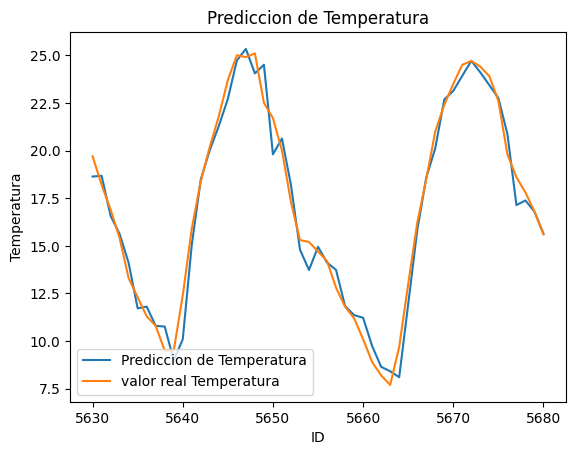

In [258]:
plt.plot(RealPredictions.iloc[5630:5681,0], label='Prediccion de Temperatura')
plt.plot(RealPredictions.iloc[5630:5681,1], label='valor real Temperatura')
plt.xlabel('ID')
plt.ylabel('Temperatura')
plt.title('Prediccion de Temperatura')
plt.legend()

Acontinuacion se realizara la prediccion de datos que aun no existen

In [280]:
#acontinuaciin se realizara la prediccion de Temperatura para una semana no incluida en el DataSet

#valores para prediccion

x_input = array([(RealPredictions.iloc[5649:5657,1]),
                 (RealPredictions.iloc[5657:5665,1]),
                 (RealPredictions.iloc[5665:5673,1]),
                 (RealPredictions.iloc[5673:5681,1])]) #resultados de las ultimas 168 horas, es decier 7 dias
x_input = x_input.reshape((4,8))# 4x8
x_input

array([[22.5, 21.7, 20. , 17.3, 15.3, 15.2, 14.7, 14.2],
       [12.8, 11.8, 11.2, 10.1,  8.9,  8.2,  7.7,  9.7],
       [13. , 16.2, 18.5, 21. , 22.4, 23.5, 24.5, 24.7],
       [24.4, 23.9, 22.6, 19.8, 18.6, 17.8, 16.8, 15.6]])

In [281]:
yhat = model.predict(x_input) # 8x4
yhat = float(yhat[0,0])
print(yhat)

1/1 [==============================] - 0s 27ms/step
13.732247352600098


In [285]:
#agregamos la prediccion
Resultados = pd.DataFrame(x_input.reshape(-1,1), columns=['Resultados'])
Prediction = pd.DataFrame({'Resultados':[yhat]})
Resultados = pd.concat([Resultados, Prediction], ignore_index=True)
Resultados

,Resultados
0,22.500000
1,21.700000
2,20.000000
3,17.300000
4,15.300000
5,15.200000
6,14.700000
7,14.200000
8,12.800000
9,11.800000


In [294]:
#se realizara la prediccion que se tendra a lo largo del dia
i=0
while i<24:
    x_input = array([(Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados']),
                     (Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados']),
                     (Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados']),
                     (Resultados.loc[0+i,'Resultados'],Resultados.loc[1+i,'Resultados'],Resultados.loc[2+i,'Resultados'],Resultados.loc[3+i,'Resultados'],Resultados.loc[4+i,'Resultados'],Resultados.loc[5+i,'Resultados'],Resultados.loc[6+i,'Resultados'],Resultados.loc[7+i,'Resultados'])])
    x_input = x_input.reshape((4,8))

    yhat = model.predict(x_input)
    yhat =float(yhat[0,0])
    
    Prediction = pd.DataFrame({'Resultados':[yhat]})
    Resultados = pd.concat([Resultados, Prediction], ignore_index=True)
    Resultados
    
    i=i+1

Resultados

1/1 [==============================] - 0s 29ms/step


,Resultados
0,22.500000
1,21.700000
2,20.000000
3,17.300000
4,15.300000
5,15.200000
6,14.700000
7,14.200000
8,12.800000
9,11.800000


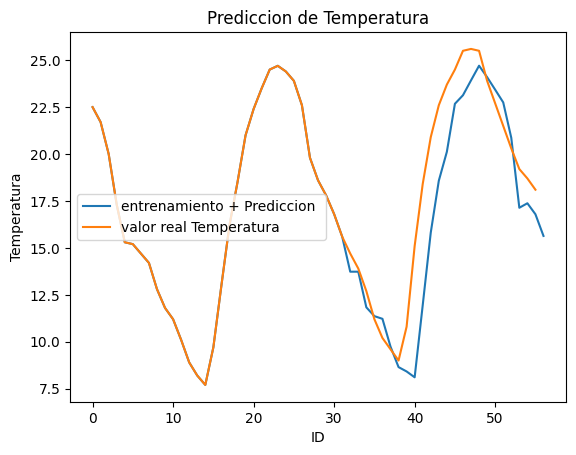

In [298]:
plt.plot(Resultados, label='entrenamiento + Prediccion ')
plt.plot([22.5,21.7,20,17.3,15.3,15.2,14.7,14.2,12.8,11.8,11.2,10.1,8.9,8.2,7.7,9.7,13,16.2,
          18.5,21,22.4,23.5,24.5,24.7,24.4,23.9,22.6,19.8,18.6,17.8,16.8,15.6,14.7,13.9,
          12.7,11.2,10.2,9.6,9,10.8,15.1,18.4,20.9,22.6,23.7,24.5,25.5,25.6,25.5,23.9,
          22.7,21.5,20.3,19.2,18.7,18.1], label='valor real Temperatura')
plt.xlabel('ID')
plt.ylabel('Temperatura')
plt.title('Prediccion de Temperatura')
plt.legend()

In [ ]:
ruta_1 = "C:/Users/52818/Desktop/UCM-1/PFLD/NEURALGAS/"
BaseAumentada = pd.read_csv("C:/Users/52818/Desktop/UCM-1/PFLD/AumentadaPFLD.csv", header=True, sep=",")
pertenencia = np.zeros((27751, 1))

In [ ]:

m = BaseAumentada.shape[0]
n = BaseAumentada.shape[1]
neuronas = np.zeros((3, n))
promedio = np.zeros((1, n))
minimo = np.zeros((1, n))
maximo = np.zeros((1, n))

In [ ]:

for i in range(n):
    minimo[0, i] = BaseAumentada.iloc[:, i].min()

for i in range(n):
    maximo[0, i] = BaseAumentada.iloc[:, i].max()

for i in range(n):
    promedio[0, i] = BaseAumentada.iloc[:, i].mean()

neuronas[0, :] = minimo[0, :]
neuronas[1, :] = promedio[0, :]
neuronas[2, :] = maximo[0, :]

data = BaseAumentada.to_numpy()
distancia = np.zeros((1, 3))
ordenar = np.zeros((1, 3))
indice = np.zeros((1, 3))
cluster = np.zeros((1, 3))

t = 0
e0 = 0.3
ef = 0.05
lam0 = 10
lamf = 0.01
tmax = m

for k in range(3):
    cluster = np.zeros((1, 3))

    for i in range(m):
        for j in range(3):
            distancia[:, j] = norm(data[i, :] - neuronas[j, :], "f")

        ordenar = np.sort(distancia)

        if distancia[:, 0] == ordenar[0]:
            indice[:, 0] = 0
            cluster[:, 0] += 1
            pertenencia[i] = 1
        if distancia[:, 1] == ordenar[0]:
            indice[:, 1] = 0
            cluster[:, 1] += 1
            pertenencia[i] = 2
        if distancia[:, 2] == ordenar[0]:
            indice[:, 2] = 0
            cluster[:, 2] += 1
            pertenencia[i] = 3

        if distancia[:, 0] == ordenar[1]:
            indice[:, 0] = 1
        if distancia[:, 1] == ordenar[1]:
            indice[:, 1] = 1
        if distancia[:, 2] == ordenar[1]:
            indice[:, 2] = 1

        if distancia[:, 0] == ordenar[2]:
            indice[:, 0] = 2
        if distancia[:, 1] == ordenar[2]:
            indice[:, 1] = 2
        if distancia[:, 2] == ordenar[2]:
            indice[:, 2] = 2

        e = e0 * ((ef / e0) ** (i / tmax))
        lam = lam0 * ((lamf / lam0) ** (i / tmax))

        neuronas[0, :] += e * np.exp(-indice[:, 0]/lam) * (data[i,:] - neuronas[0,:])
        neuronas[1, :] += e * np.exp(-indice[:, 1]/lam) * (data[i,:] - neuronas[1,:])
        neuronas[2, :] += e * np.exp(-indice[:, 2]/lam) * (data[i,:] - neuronas[2,:])

nombre_neurona=["Neurona1","Neurona2","Neurona3"]
neuronas_p=pd.DataFrame(np.hstack([np.array(nombre_neurona).reshape(-1,1),neuronas]))
neuronas_p.to_csv(ruta_1 + "NEURONAS.csv", index=False)

sump_1=neuronas.sum(axis=1)[0]/30
sump_2=neuronas.sum(axis=1)[1]/30
sump_3=neuronas.sum(axis=1)[2]/30
suma_promedio=np.hstack([np.array(nombre_neurona).reshape(-1,1),np.array([sump_1,sump_2,sump_3]).reshape(-1,1)])
suma_promedio=pd.DataFrame(suma_promedio)
suma_promedio.to_csv(ruta_1 + "SUMA.PROMEDIO.csv", index=False)

cluster=pd.DataFrame(np.hstack([np.array(nombre_neurona).reshape(-1,1),cluster.reshape(-1,1)]))
cluster.to_csv(ruta_1 + "Total.Elementos.Cluster.csv", index=False)

pertenencia=pd.DataFrame(pertenencia)
base_actualizada=pd.concat([pertenencia,BaseAumentada],axis=1)
base_actualizada.to_csv(ruta_1 + "Pertenencia.csv", index=False)
